In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
np.set_printoptions(threshold=np.nan)
import geopandas as gpd

import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns

%matplotlib inline

In [10]:
data = pd.read_csv('AllZipsTimes.csv')
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.shape

(237, 238)

In [11]:
data.shape

(237, 238)

In [12]:
zipsUnderHour = {zips:[] for zips in data['ZIPCODE']}
zipsUnderHourTimes = {zips:[] for zips in data['ZIPCODE']}

In [13]:
len(zipsUnderHour)

237

In [61]:
#dataDict = data.drop(['Centroid_x', 'Centroid_y'], axis=1)
#dataDict.head()

In [14]:
for i in range(len(data)):

    for cols in data.columns[1:]:
        
        if type(data[cols][i]) == np.int64:
            
            if data[cols][i] < 60:
                zipsUnderHour[data.ZIPCODE[i]].append(cols)
                zipsUnderHourTimes[data.ZIPCODE[i]].append(data[cols][i])

In [15]:
zipsUnderHour

{10001.0: ['10474',
  '11101',
  '11102',
  '11103',
  '11104',
  '10047',
  '10048',
  '10055',
  '10065',
  '10069',
  '10075',
  '10080',
  '10081',
  '10096',
  '10097',
  '10103',
  '10104',
  '10105',
  '10106',
  '10107',
  '10110',
  '10111',
  '10112',
  '10115',
  '10304',
  '10451',
  '10452',
  '10453',
  '10454',
  '10455',
  '10456',
  '10457',
  '10458',
  '10459',
  '10460',
  '10463',
  '10468',
  '10472',
  '10118',
  '10119',
  '10120',
  '10121',
  '10122',
  '10123',
  '10128',
  '10151',
  '10152',
  '10153',
  '10154',
  '10155',
  '10158',
  '10162',
  '10165',
  '10166',
  '10167',
  '10168',
  '10169',
  '10170',
  '10171',
  '10172',
  '10174',
  '10178',
  '10196',
  '10203',
  '10259',
  '10260',
  '10265',
  '10270',
  '10271',
  '10275',
  '10278',
  '10279',
  '10280',
  '10281',
  '10285',
  '10286',
  '10001',
  '10002',
  '10003',
  '10004',
  '10005',
  '10006',
  '10007',
  '10009',
  '10010',
  '10011',
  '10012',
  '10013',
  '10014',
  '10016',
 

In [16]:
zipsUnderHourTimes

{10001.0: [51,
  23,
  43,
  39,
  29,
  15,
  18,
  16,
  26,
  22,
  29,
  19,
  19,
  14,
  12,
  15,
  16,
  15,
  16,
  14,
  15,
  18,
  15,
  27,
  55,
  37,
  40,
  49,
  40,
  35,
  52,
  47,
  52,
  40,
  45,
  46,
  44,
  50,
  13,
  6,
  7,
  6,
  7,
  8,
  31,
  19,
  17,
  20,
  18,
  21,
  27,
  29,
  19,
  19,
  25,
  16,
  19,
  15,
  21,
  21,
  16,
  16,
  15,
  22,
  20,
  22,
  24,
  21,
  20,
  20,
  21,
  17,
  23,
  24,
  21,
  20,
  0,
  24,
  24,
  27,
  23,
  20,
  14,
  29,
  15,
  9,
  19,
  15,
  14,
  19,
  21,
  10,
  16,
  16,
  16,
  21,
  24,
  27,
  20,
  27,
  34,
  33,
  29,
  43,
  40,
  26,
  28,
  29,
  18,
  40,
  38,
  27,
  29,
  47,
  39,
  48,
  40,
  55,
  22,
  58,
  48,
  55,
  38,
  31,
  33,
  47,
  43,
  48,
  37,
  36,
  47,
  49,
  53,
  37,
  35,
  38,
  58,
  36,
  34,
  34,
  44,
  37,
  32,
  45,
  45,
  32,
  54,
  24,
  59,
  34,
  55,
  53,
  55,
  43,
  45,
  54,
  56,
  54,
  42,
  37,
  36,
  36,
  17,
  43,
  59,
  46,
  

In [333]:
ZipsWithinHourCount = {zips:[] for zips in data['ZIPCODE']}

for i in range(len(data.columns[1:])):
    ZipsWithinHourCount[data.ZIPCODE[i]].append(len(zipsUnderHour.get(data.ZIPCODE[i])))
    

In [334]:
ZipsWithinHourCount

{10001.0: [183],
 10002.0: [168],
 10003.0: [180],
 10004.0: [180],
 10005.0: [181],
 10006.0: [183],
 10007.0: [179],
 10009.0: [141],
 10010.0: [164],
 10011.0: [176],
 10012.0: [179],
 10013.0: [179],
 10014.0: [169],
 10016.0: [170],
 10017.0: [181],
 10018.0: [177],
 10019.0: [166],
 10020.0: [182],
 10021.0: [166],
 10022.0: [184],
 10023.0: [167],
 10024.0: [158],
 10025.0: [147],
 10026.0: [155],
 10027.0: [159],
 10028.0: [163],
 10029.0: [149],
 10030.0: [134],
 10031.0: [133],
 10032.0: [128],
 10033.0: [117],
 10034.0: [114],
 10035.0: [148],
 10036.0: [168],
 10037.0: [137],
 10038.0: [175],
 10039.0: [126],
 10040.0: [109],
 10041.0: [166],
 10043.0: [169],
 10044.0: [180],
 10045.0: [180],
 10047.0: [178],
 10048.0: [176],
 10055.0: [185],
 10065.0: [179],
 10069.0: [141],
 10075.0: [156],
 10080.0: [182],
 10081.0: [180],
 10096.0: [180],
 10097.0: [178],
 10103.0: [183],
 10104.0: [184],
 10105.0: [182],
 10106.0: [180],
 10107.0: [174],
 10110.0: [186],
 10111.0: [180

In [335]:
OneHourCount = pd.DataFrame.from_dict(ZipsWithinHourCount, orient='index')
OneHourCount.head()

,0
10259.0,183
10260.0,180
10265.0,175
10270.0,177
10271.0,183


In [336]:
OneHourCount['ZIPCODE'] = OneHourCount.index
OneHourCount.rename(columns={'0':'ZipsWithinHour'}, inplace=True)
OneHourCount.reset_index(drop=True, inplace=True)

In [337]:
OneHourCount.head()

,0,ZIPCODE
0,183,10259.0
1,180,10260.0
2,175,10265.0
3,177,10270.0
4,183,10271.0


In [338]:
OneHourCount.sort_values(by=0, ascending=False)

,0,ZIPCODE
174,197,10119.0
177,197,10122.0
184,196,10155.0
178,196,10123.0
176,195,10121.0
175,193,10120.0
181,191,10152.0
183,190,10154.0
192,189,10170.0
222,188,10203.0


In [352]:
dataJobs = pd.read_csv('JobsWithChange.csv')
dataJobs.head()

,Unnamed: 0,ZIPCODE,2015_total,geometry,perc_change
0,0,83.0,0.000000,"POLYGON ((998309.7254775614 229616.6812362969,...",NaN
1,1,10001.0,183574.208194,"POLYGON ((981958.6472873986 213464.4530421346,...",0.223889
2,2,10002.0,23303.050046,"POLYGON ((991339.8703228086 207576.7837151289,...",0.238397
3,3,10003.0,80194.913684,"POLYGON ((989830.469142139 207048.1263078749, ...",0.131184
4,4,10004.0,49802.929338,MULTIPOLYGON (((977542.4500830621 188447.27833...,0.315563


In [142]:
dataJobs1 = pd.read_csv('nyc_jobs_by_zipcode.csv')
dataJobs1.head()

,ZIP,2010_main,2010_aux,2010_total,2011_main,2011_aux,2011_total,2012_main,2012_aux,2012_total,2013_main,2013_aux,2013_total,2014_main,2014_aux,2014_total,2015_main,2015_aux,2015_total
0,10001,110844.034347,19581.224930,130425.259277,119934.398116,23090.888002,143025.286117,125107.527841,25479.839613,150587.367454,130289.410633,25957.475047,156246.885680,141243.473574,27495.652957,168739.126530,139210.585312,25517.325040,164727.910353
1,10002,17501.189156,1315.914654,18817.103810,18241.376674,1509.372059,19750.748733,18575.186672,1630.603800,20205.790472,17311.940049,1721.605455,19033.545504,19097.528421,1921.498079,21019.026500,21439.070402,1863.979643,23303.050046
2,10003,61530.840315,9363.819239,70894.659554,64739.789084,10308.860475,75048.649559,59786.418308,10273.453187,70059.871496,62081.330388,10712.407074,72793.737462,64501.109568,11508.768508,76009.878076,69158.840084,11036.073600,80194.913684
3,10004,29653.820952,7383.809509,37037.630460,31956.568737,7831.348067,39787.916803,34086.517676,8482.183181,42568.700857,32776.487794,8014.649468,40791.137261,38354.697164,8961.738961,47316.436125,40094.595260,8584.264357,48678.859617
4,10005,44953.776763,12602.323590,57556.100352,43606.040890,12769.476561,56375.517451,43311.874140,12738.632010,56050.506150,39880.206253,12228.742810,52108.949063,39087.680497,11178.336790,50266.017287,39821.496535,9739.560536,49561.057071


In [143]:
dataJobs1['change'] = dataJobs1['2015_total'] - dataJobs1['2010_total']

In [144]:
dataJobs1.sort_values(by='change').head()

,ZIP,2010_main,2010_aux,2010_total,2011_main,2011_aux,2011_total,2012_main,2012_aux,2012_total,2013_main,2013_aux,2013_total,2014_main,2014_aux,2014_total,2015_main,2015_aux,2015_total,change
166,11201,206800.284905,14015.644335,220815.929240,207555.564105,14696.198090,222251.762195,200419.466771,14895.817326,215315.284097,203202.893439,15596.958424,218799.851862,201784.405152,15959.799878,217744.205031,98413.647980,10656.804055,109070.452035,-111745.477205
205,11242,43711.862487,1795.577351,45507.439838,44563.158746,1923.106168,46486.264914,41815.729019,1967.587462,43783.316481,41484.248736,2047.322548,43531.571284,40739.660263,2082.576340,42822.236603,2513.193124,189.518706,2702.711830,-42804.728008
12,10013,176304.313616,18930.070299,195234.383915,171174.017372,19569.983974,190744.001346,183543.764490,22059.928985,205603.693476,185392.757013,23175.009886,208567.766898,180913.830840,23271.276935,204185.107776,141433.859878,18377.081517,159810.941395,-35423.442520
204,11241,27460.016178,1127.990900,28588.007078,27994.804853,1208.105157,29202.910010,26268.855410,1236.048534,27504.903943,26060.617796,1286.138524,27346.756320,25592.863498,1308.285137,26901.148635,1578.800809,119.056623,1697.857432,-26890.149646
4,10005,44953.776763,12602.323590,57556.100352,43606.040890,12769.476561,56375.517451,43311.874140,12738.632010,56050.506150,39880.206253,12228.742810,52108.949063,39087.680497,11178.336790,50266.017287,39821.496535,9739.560536,49561.057071,-7995.043281


In [2]:
dataJobs2 = gpd.read_file('nyc_cbds_final/nyc_cbds_final.shp')
dataJobs2.head()

,ZIPCODE,2014_main,2013_main,2013_aux,COUNTY,2015_main,2012_total,2010_main,2014_total,2010_total,...,2015_per_m,rank,top,rank_notMN,top_notMN,top_all,x,y,CBDs,geometry
0,83.0,NaN,NaN,NaN,New York,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,0,0,993788.744524,224355.691895,-1.0,"POLYGON ((998309.7254775614 229616.6812362969,..."
1,10001.0,158081.306253,147100.025839,29495.888233,New York,154839.319753,170271.223443,127396.025668,189201.340778,149992.497620,...,287591.963163,9.0,1,166.0,0,1,985100.719055,212599.489066,1.0,"POLYGON ((981958.6472873986 213464.4530421346,..."
2,10002.0,19097.528421,17311.940049,1721.605455,New York,21439.070402,20205.790472,17501.189156,21019.026500,18817.103810,...,24719.910595,39.0,0,166.0,0,0,988220.437683,200190.136386,-1.0,"POLYGON ((991339.8703228086 207576.7837151289,..."
3,10003.0,64501.109568,62081.330388,10712.407074,New York,69158.840084,70059.871496,61530.840315,76009.878076,70894.659554,...,143880.788255,19.0,0,166.0,0,0,987340.306340,205944.672343,-1.0,"POLYGON ((989830.469142139 207048.1263078749, ..."
4,10004.0,39238.790292,33490.618770,8178.384029,New York,41028.223248,43504.289005,30317.620752,48395.422181,37856.752472,...,346882.881920,8.0,1,166.0,0,1,980687.983241,195570.586613,0.0,"POLYGON ((981197.408652395 196571.0816452205, ..."


In [3]:
dataJobs2['change'] = dataJobs2['2015_total'] - dataJobs2['2010_total']
dataJobs2.head()

,ZIPCODE,2014_main,2013_main,2013_aux,COUNTY,2015_main,2012_total,2010_main,2014_total,2010_total,...,rank,top,rank_notMN,top_notMN,top_all,x,y,CBDs,geometry,change
0,83.0,NaN,NaN,NaN,New York,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,0,0,993788.744524,224355.691895,-1.0,"POLYGON ((998309.7254775614 229616.6812362969,...",NaN
1,10001.0,158081.306253,147100.025839,29495.888233,New York,154839.319753,170271.223443,127396.025668,189201.340778,149992.497620,...,9.0,1,166.0,0,1,985100.719055,212599.489066,1.0,"POLYGON ((981958.6472873986 213464.4530421346,...",33581.710574
2,10002.0,19097.528421,17311.940049,1721.605455,New York,21439.070402,20205.790472,17501.189156,21019.026500,18817.103810,...,39.0,0,166.0,0,0,988220.437683,200190.136386,-1.0,"POLYGON ((991339.8703228086 207576.7837151289,...",4485.946236
3,10003.0,64501.109568,62081.330388,10712.407074,New York,69158.840084,70059.871496,61530.840315,76009.878076,70894.659554,...,19.0,0,166.0,0,0,987340.306340,205944.672343,-1.0,"POLYGON ((989830.469142139 207048.1263078749, ...",9300.254130
4,10004.0,39238.790292,33490.618770,8178.384029,New York,41028.223248,43504.289005,30317.620752,48395.422181,37856.752472,...,8.0,1,166.0,0,1,980687.983241,195570.586613,0.0,"POLYGON ((981197.408652395 196571.0816452205, ...",11946.176866


In [8]:
dataJobs2.sort_values(by='change').head()

,ZIPCODE,2014_main,2013_main,2013_aux,COUNTY,2015_main,2012_total,2010_main,2014_total,2010_total,...,rank,top,rank_notMN,top_notMN,top_all,x,y,CBDs,geometry,change
5,10005.0,42550.105749,43517.336279,13375.093312,New York,43330.350179,61201.345346,49133.608421,54751.143544,62925.121081,...,2.0,1,166.0,0,1,981855.750490,196537.330032,0.0,"POLYGON ((982595.6794779003 195880.7536295503,...",-8975.783231
7,10007.0,52480.335645,51647.337340,6896.658927,New York,47733.664321,58101.057340,56677.860098,59745.840353,62990.126881,...,11.0,1,166.0,0,1,982160.651275,199404.802224,0.0,"POLYGON ((980538.9073447287 200658.5114624649,...",-8497.930887
52,10305.0,8598.329003,12234.439335,1580.901951,Richmond,9774.295901,13965.287395,12707.356230,9621.918372,14240.243815,...,153.0,0,106.0,0,0,963294.354582,156090.559866,-1.0,"POLYGON ((966589.4293382317 163908.5154087991,...",-3391.152020
19,10021.0,28430.459510,26526.885619,4158.937303,New York,28452.461645,29563.200889,30453.127500,32818.735478,35599.473072,...,23.0,0,166.0,0,0,995660.267186,219762.515892,-1.0,"POLYGON ((998204.3503602296 218909.3384778053,...",-3105.855299
97,11201.0,201784.405152,203202.893439,15596.958424,Kings,98413.647980,215315.284097,206800.284905,217744.205031,220815.929240,...,25.0,0,1.0,2,2,987194.513467,192431.928028,2.0,"POLYGON ((990158.9799680561 196291.4030707181,...",-3071.724209


In [7]:
dataJobs2.iloc[97, -1] = dataJobs2.loc[97, '2014_total'] - dataJobs2.loc[97, '2010_total']
dataJobs2.iloc[12, -1] = dataJobs2.loc[12, '2014_total'] - dataJobs2.loc[12, '2010_total']

In [182]:
dataJobs2[(dataJobs2.ZIPCODE == 10047)]

,ZIPCODE,2014_main,2013_main,2013_aux,COUNTY,2015_main,2012_total,2010_main,2014_total,2010_total,...,rank,top,rank_notMN,top_notMN,top_all,x,y,CBDs,geometry,change


In [183]:
dataJobs2.head()

,ZIPCODE,2014_main,2013_main,2013_aux,COUNTY,2015_main,2012_total,2010_main,2014_total,2010_total,...,rank,top,rank_notMN,top_notMN,top_all,x,y,CBDs,geometry,change
0,83.0,NaN,NaN,NaN,New York,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,0,0,993788.744524,224355.691895,-1.0,"POLYGON ((998309.7254775614 229616.6812362969,...",NaN
1,10001.0,158081.306253,147100.025839,29495.888233,New York,154839.319753,170271.223443,127396.025668,189201.340778,149992.497620,...,9.0,1,166.0,0,1,985100.719055,212599.489066,1.0,"POLYGON ((981958.6472873986 213464.4530421346,...",33581.710574
2,10002.0,19097.528421,17311.940049,1721.605455,New York,21439.070402,20205.790472,17501.189156,21019.026500,18817.103810,...,39.0,0,166.0,0,0,988220.437683,200190.136386,-1.0,"POLYGON ((991339.8703228086 207576.7837151289,...",4485.946236
3,10003.0,64501.109568,62081.330388,10712.407074,New York,69158.840084,70059.871496,61530.840315,76009.878076,70894.659554,...,19.0,0,166.0,0,0,987340.306340,205944.672343,-1.0,"POLYGON ((989830.469142139 207048.1263078749, ...",9300.254130
4,10004.0,39238.790292,33490.618770,8178.384029,New York,41028.223248,43504.289005,30317.620752,48395.422181,37856.752472,...,8.0,1,166.0,0,1,980687.983241,195570.586613,0.0,"POLYGON ((981197.408652395 196571.0816452205, ...",11946.176866


In [19]:
zipsFeatures2010 = {zips:[] for zips in data['ZIPCODE']}

for key, value in zipsUnderHour.iteritems():
    print value
    feature = 0.0
    for i, val in enumerate(value):
        #print val
        change = dataJobs2.loc[dataJobs2.ZIPCODE == int(val), '2010_total']
        #print change.values[0]
        time = zipsUnderHourTimes.get(key)[i]
        if time == 0:
            time = 1
        #print type(change)
        if len(change) != 0 and ~np.isnan(change.values[0]):

            feature = feature + float(change.values[0])/float(time)
        else:
            pass
        
    zipsFeatures2010[key] = feature

['10474', '11101', '11102', '11103', '11104', '10047', '10048', '10055', '10065', '10069', '10075', '10080', '10081', '10096', '10097', '10103', '10104', '10105', '10106', '10107', '10110', '10111', '10112', '10115', '10302', '10304', '10305', '10306', '10310', '10451', '10452', '10453', '10454', '10455', '10456', '10457', '10458', '10459', '10460', '10461', '10462', '10463', '10465', '10467', '10468', '10470', '10472', '10118', '10119', '10120', '10121', '10122', '10123', '10128', '10151', '10152', '10153', '10154', '10155', '10158', '10162', '10165', '10166', '10167', '10168', '10169', '10170', '10171', '10172', '10174', '10178', '10196', '10203', '10259', '10260', '10265', '10270', '10271', '10275', '10278', '10279', '10280', '10281', '10285', '10286', '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10009', '10010', '10011', '10012', '10013', '10014', '10016', '10017', '10018', '10019', '10020', '10021', '10024', '10025', '10026', '10027', '10028', '10029', '10030', 

['10474', '11101', '11102', '11103', '11104', '10047', '10048', '10055', '10065', '10069', '10075', '10080', '10081', '10096', '10097', '10103', '10104', '10105', '10106', '10107', '10110', '10111', '10112', '10115', '10304', '10305', '10306', '10451', '10452', '10453', '10454', '10455', '10456', '10457', '10458', '10459', '10460', '10461', '10462', '10463', '10465', '10468', '10470', '10472', '10118', '10119', '10120', '10121', '10122', '10123', '10128', '10151', '10152', '10153', '10154', '10155', '10158', '10162', '10165', '10166', '10167', '10168', '10169', '10170', '10171', '10172', '10174', '10178', '10196', '10203', '10259', '10260', '10265', '10270', '10271', '10275', '10278', '10279', '10280', '10281', '10285', '10286', '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10009', '10010', '10011', '10012', '10013', '10014', '10016', '10017', '10018', '10019', '10020', '10021', '10024', '10025', '10026', '10027', '10028', '10029', '10030', '10037', '10039', '10040', 

['11101', '10047', '10048', '10055', '10065', '10069', '10080', '10081', '10096', '10097', '10103', '10104', '10105', '10106', '10107', '10110', '10111', '10112', '10115', '10304', '10305', '10306', '10118', '10119', '10120', '10121', '10122', '10123', '10128', '10151', '10152', '10153', '10154', '10155', '10158', '10165', '10166', '10167', '10168', '10169', '10170', '10171', '10172', '10174', '10178', '10196', '10203', '10259', '10260', '10265', '10270', '10271', '10275', '10278', '10279', '10280', '10281', '10285', '10286', '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10009', '10010', '10011', '10012', '10013', '10014', '10016', '10017', '10018', '10019', '10020', '10021', '10027', '10041', '10043', '10045', '11109', '11201', '11203', '11204', '11205', '11206', '11207', '11208', '11209', '11210', '11211', '11212', '11213', '11214', '11215', '11216', '11217', '11218', '11219', '11220', '11221', '11222', '11223', '11224', '11225', '11226', '11228', '11229', '11230', 

['11101', '10001', '11354', '11355', '11356', '11357', '11358', '11359', '11360', '11361', '11363', '11364', '11365', '11366', '11368', '11369', '11370', '11372', '11377', '11415', '11423', '11426', '11427', '11428', '11429', '11432', '11433']
['11001', '11004', '11005', '11040', '11101', '11102', '11103', '11104', '10047', '10048', '10055', '10065', '10069', '10075', '10080', '10081', '10096', '10097', '10103', '10104', '10105', '10106', '10107', '10110', '10111', '10112', '10465', '10118', '10119', '10120', '10121', '10122', '10123', '10151', '10152', '10153', '10154', '10155', '10158', '10165', '10166', '10167', '10168', '10169', '10170', '10171', '10172', '10174', '10178', '10196', '10203', '10259', '10260', '10265', '10270', '10271', '10278', '10279', '10281', '10285', '10286', '10001', '10003', '10006', '10007', '10009', '10011', '10012', '10013', '10014', '10016', '10017', '10018', '10019', '10020', '10021', '10024', '10025', '10026', '10027', '10044', '11105', '11106', '11109',

['11004', '11101', '11102', '11103', '11104', '10047', '10048', '10055', '10065', '10069', '10075', '10080', '10081', '10096', '10097', '10103', '10104', '10105', '10106', '10107', '10110', '10111', '10112', '10115', '10451', '10452', '10454', '10455', '10118', '10119', '10120', '10121', '10122', '10123', '10128', '10151', '10152', '10153', '10154', '10155', '10158', '10162', '10165', '10166', '10167', '10168', '10169', '10170', '10171', '10172', '10174', '10178', '10196', '10203', '10259', '10260', '10265', '10270', '10271', '10275', '10278', '10279', '10280', '10281', '10285', '10286', '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10010', '10011', '10012', '10013', '10014', '10016', '10017', '10018', '10019', '10020', '10021', '10024', '10025', '10026', '10027', '10028', '10029', '10030', '10037', '10039', '10041', '10043', '10044', '10045', '11105', '11106', '11109', '11201', '11205', '11206', '11208', '11211', '11216', '11217', '11222', '11231', '11237', '11249', 

['11101', '11103', '10048', '10080', '10081', '10096', '10103', '10104', '10105', '10107', '10112', '10118', '10119', '10120', '10121', '10122', '10123', '10154', '10155', '10158', '10165', '10166', '10167', '10168', '10169', '10170', '10172', '10174', '10178', '10196', '10203', '10259', '10260', '10265', '10270', '10271', '10275', '10278', '10279', '10280', '10281', '10285', '10286', '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10009', '10010', '10011', '10012', '10013', '10014', '10018', '10020', '10041', '10044', '10045', '11201', '11203', '11205', '11206', '11207', '11208', '11211', '11212', '11213', '11215', '11216', '11217', '11218', '11221', '11222', '11225', '11231', '11232', '11233', '11236', '11237', '11238', '11239', '11249', '11251', '11366', '11367', '11368', '11372', '11373', '11374', '11375', '11377', '11378', '11379', '11385', '11411', '11412', '11413', '11414', '11415', '11416', '11417', '11418', '11419', '11420', '11421', '11423', '11427', '11428', 

['11001', '11004', '11005', '11040', '11101', '11102', '11103', '11104', '10047', '10048', '10055', '10065', '10075', '10096', '10097', '10103', '10104', '10105', '10106', '10107', '10110', '10111', '10112', '10454', '10118', '10119', '10120', '10121', '10122', '10123', '10128', '10151', '10152', '10153', '10154', '10155', '10158', '10162', '10165', '10166', '10167', '10168', '10169', '10170', '10171', '10172', '10174', '10178', '10196', '10203', '10259', '10260', '10265', '10271', '10275', '10278', '10286', '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10010', '10011', '10012', '10014', '10016', '10017', '10018', '10020', '10021', '10028', '10044', '11105', '11106', '11109', '11205', '11206', '11207', '11208', '11211', '11212', '11213', '11216', '11217', '11221', '11222', '11233', '11236', '11237', '11238', '11355', '11357', '11358', '11360', '11361', '11362', '11363', '11364', '11365', '11366', '11367', '11368', '11369', '11370', '11371', '11372', '11373', '11374', 

['10473', '10474', '10475', '11101', '11102', '11103', '11104', '10047', '10048', '10055', '10065', '10069', '10075', '10080', '10081', '10096', '10097', '10103', '10104', '10105', '10106', '10107', '10110', '10111', '10112', '10115', '10451', '10452', '10453', '10454', '10455', '10456', '10457', '10458', '10459', '10460', '10461', '10462', '10463', '10464', '10465', '10466', '10467', '10468', '10469', '10470', '10471', '10472', '10118', '10119', '10120', '10121', '10122', '10123', '10128', '10151', '10152', '10153', '10154', '10155', '10158', '10162', '10165', '10166', '10167', '10168', '10169', '10170', '10171', '10172', '10174', '10178', '10196', '10203', '10259', '10260', '10265', '10270', '10271', '10275', '10278', '10279', '10280', '10281', '10285', '10286', '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10009', '10010', '10011', '10012', '10013', '10014', '10016', '10017', '10018', '10019', '10020', '10021', '10024', '10025', '10026', '10027', '10028', '10029', 

['10474', '10475', '10047', '10096', '10103', '10104', '10110', '10115', '10451', '10452', '10453', '10454', '10455', '10456', '10457', '10458', '10459', '10460', '10461', '10462', '10463', '10464', '10466', '10467', '10468', '10469', '10470', '10472', '10152', '10154', '10158', '10162', '10165', '10166', '10167', '10168', '10169', '10170', '10171', '10172', '10174', '10178', '10024', '10026', '10029', '10030', '10037']
['10473', '10474', '10475', '11101', '10055', '10075', '10080', '10096', '10103', '10105', '10107', '10110', '10111', '10112', '10451', '10452', '10453', '10454', '10455', '10456', '10457', '10458', '10459', '10460', '10461', '10462', '10463', '10464', '10465', '10466', '10467', '10468', '10469', '10470', '10472', '10128', '10151', '10152', '10155', '10158', '10165', '10166', '10167', '10168', '10169', '10170', '10171', '10172', '10174', '10178', '10203', '10259', '10003', '10010', '10012', '10017', '10024', '10025', '10026', '10027', '10028', '10029', '10030', '10037',

['10474', '10475', '11101', '11102', '11103', '11104', '10047', '10048', '10055', '10065', '10069', '10075', '10080', '10081', '10096', '10097', '10103', '10104', '10105', '10106', '10107', '10110', '10111', '10112', '10115', '10305', '10451', '10452', '10453', '10454', '10455', '10456', '10457', '10458', '10459', '10460', '10462', '10463', '10465', '10467', '10468', '10469', '10470', '10471', '10472', '10118', '10119', '10120', '10121', '10122', '10123', '10128', '10151', '10152', '10153', '10154', '10155', '10158', '10162', '10165', '10166', '10167', '10168', '10169', '10170', '10171', '10172', '10174', '10178', '10196', '10203', '10259', '10260', '10265', '10270', '10271', '10275', '10278', '10279', '10280', '10281', '10285', '10286', '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10009', '10010', '10011', '10012', '10013', '10014', '10016', '10017', '10018', '10019', '10020', '10021', '10024', '10025', '10026', '10027', '10028', '10029', '10030', '10037', '10039', 

['10474', '11101', '11102', '11103', '11104', '10047', '10048', '10055', '10065', '10069', '10075', '10080', '10081', '10096', '10097', '10103', '10104', '10105', '10106', '10107', '10110', '10111', '10112', '10115', '10304', '10305', '10451', '10452', '10453', '10454', '10455', '10456', '10457', '10458', '10459', '10460', '10463', '10465', '10467', '10468', '10470', '10472', '10118', '10119', '10120', '10121', '10122', '10123', '10128', '10151', '10152', '10153', '10154', '10155', '10158', '10162', '10165', '10166', '10167', '10168', '10169', '10170', '10171', '10172', '10174', '10178', '10196', '10203', '10259', '10260', '10265', '10270', '10271', '10275', '10278', '10279', '10280', '10281', '10285', '10286', '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10009', '10010', '10011', '10012', '10013', '10014', '10016', '10017', '10018', '10019', '10020', '10021', '10024', '10025', '10026', '10027', '10028', '10029', '10030', '10037', '10039', '10040', '10041', '10043', 

['10474', '11101', '11102', '11103', '11104', '10047', '10048', '10055', '10065', '10069', '10075', '10080', '10081', '10096', '10097', '10103', '10104', '10105', '10106', '10107', '10110', '10111', '10112', '10115', '10451', '10452', '10453', '10454', '10455', '10456', '10457', '10458', '10459', '10460', '10461', '10463', '10465', '10468', '10472', '10118', '10119', '10120', '10121', '10122', '10123', '10128', '10151', '10152', '10153', '10154', '10155', '10158', '10162', '10165', '10166', '10167', '10168', '10169', '10170', '10171', '10172', '10174', '10178', '10196', '10203', '10259', '10260', '10265', '10270', '10271', '10275', '10278', '10279', '10280', '10281', '10285', '10286', '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10009', '10010', '10011', '10012', '10013', '10014', '10016', '10017', '10018', '10019', '10020', '10021', '10024', '10025', '10026', '10027', '10028', '10029', '10030', '10037', '10039', '10040', '10041', '10043', '10044', '10045', '11105', 

['10473', '10474', '10475', '11101', '11102', '11103', '11104', '10047', '10048', '10055', '10065', '10069', '10075', '10080', '10081', '10096', '10097', '10103', '10104', '10105', '10106', '10107', '10110', '10111', '10112', '10115', '10451', '10452', '10453', '10454', '10455', '10456', '10457', '10458', '10459', '10460', '10461', '10462', '10463', '10465', '10466', '10467', '10468', '10469', '10470', '10471', '10472', '10118', '10119', '10120', '10121', '10122', '10123', '10128', '10151', '10152', '10153', '10154', '10155', '10158', '10162', '10165', '10166', '10167', '10168', '10169', '10170', '10171', '10172', '10174', '10178', '10196', '10203', '10259', '10260', '10265', '10270', '10271', '10275', '10278', '10279', '10280', '10281', '10285', '10286', '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10009', '10010', '10011', '10012', '10013', '10014', '10016', '10017', '10018', '10019', '10020', '10021', '10024', '10025', '10026', '10027', '10028', '10029', '10030', 

['10474', '11101', '11102', '11103', '11104', '10047', '10048', '10055', '10065', '10069', '10075', '10080', '10081', '10096', '10097', '10103', '10104', '10105', '10106', '10107', '10110', '10111', '10112', '10115', '10451', '10452', '10453', '10454', '10455', '10456', '10457', '10458', '10459', '10460', '10463', '10467', '10468', '10470', '10471', '10472', '10118', '10119', '10120', '10121', '10122', '10123', '10128', '10151', '10152', '10153', '10154', '10155', '10158', '10162', '10165', '10166', '10167', '10168', '10169', '10170', '10171', '10172', '10174', '10178', '10196', '10203', '10259', '10260', '10265', '10270', '10271', '10275', '10278', '10279', '10280', '10281', '10285', '10286', '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10009', '10010', '10011', '10012', '10013', '10014', '10016', '10017', '10018', '10019', '10020', '10021', '10024', '10025', '10026', '10027', '10028', '10029', '10030', '10037', '10039', '10040', '10041', '10043', '10044', '10045', 

['10474', '11101', '11102', '11103', '11104', '10047', '10048', '10055', '10065', '10069', '10075', '10080', '10081', '10096', '10097', '10103', '10104', '10105', '10106', '10107', '10110', '10111', '10112', '10115', '10304', '10305', '10306', '10310', '10451', '10452', '10453', '10454', '10455', '10456', '10457', '10458', '10459', '10460', '10461', '10462', '10463', '10465', '10468', '10470', '10472', '10118', '10119', '10120', '10121', '10122', '10123', '10128', '10151', '10152', '10153', '10154', '10155', '10158', '10162', '10165', '10166', '10167', '10168', '10169', '10170', '10171', '10172', '10174', '10178', '10196', '10203', '10259', '10260', '10265', '10270', '10271', '10275', '10278', '10279', '10280', '10281', '10285', '10286', '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10009', '10010', '10011', '10012', '10013', '10014', '10016', '10017', '10018', '10019', '10020', '10021', '10024', '10025', '10026', '10027', '10028', '10029', '10030', '10037', '10039', 

['10474', '11101', '11102', '11103', '11104', '10047', '10048', '10055', '10065', '10069', '10075', '10080', '10081', '10096', '10097', '10103', '10104', '10105', '10106', '10107', '10110', '10111', '10112', '10115', '10451', '10452', '10454', '10455', '10456', '10458', '10459', '10465', '10472', '10118', '10119', '10120', '10121', '10122', '10123', '10128', '10151', '10152', '10153', '10154', '10155', '10158', '10162', '10165', '10166', '10167', '10168', '10169', '10170', '10171', '10172', '10174', '10178', '10196', '10203', '10259', '10260', '10265', '10270', '10271', '10275', '10278', '10279', '10280', '10281', '10285', '10286', '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10009', '10010', '10011', '10012', '10013', '10014', '10016', '10017', '10018', '10019', '10020', '10021', '10024', '10025', '10026', '10027', '10028', '10029', '10030', '10037', '10039', '10041', '10043', '10044', '10045', '11105', '11106', '11109', '11201', '11205', '11206', '11211', '11217', 

['10473', '10474', '10475', '11101', '11102', '11103', '11104', '10047', '10048', '10055', '10065', '10069', '10075', '10080', '10081', '10096', '10097', '10103', '10104', '10105', '10106', '10107', '10110', '10111', '10112', '10115', '10451', '10452', '10453', '10454', '10455', '10456', '10457', '10458', '10459', '10460', '10461', '10462', '10463', '10465', '10468', '10469', '10470', '10471', '10472', '10118', '10119', '10120', '10121', '10122', '10123', '10128', '10151', '10152', '10153', '10154', '10155', '10158', '10162', '10165', '10166', '10167', '10168', '10169', '10170', '10171', '10172', '10174', '10178', '10196', '10203', '10259', '10260', '10265', '10270', '10271', '10275', '10278', '10279', '10280', '10281', '10285', '10286', '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10009', '10010', '10011', '10012', '10013', '10014', '10016', '10017', '10018', '10019', '10020', '10021', '10024', '10025', '10026', '10027', '10028', '10029', '10030', '10037', '10039', 

['10474', '10475', '11101', '11102', '11103', '11104', '10047', '10048', '10055', '10065', '10069', '10075', '10080', '10081', '10096', '10097', '10103', '10104', '10105', '10106', '10107', '10110', '10111', '10112', '10115', '10451', '10452', '10453', '10454', '10455', '10456', '10457', '10458', '10459', '10460', '10461', '10462', '10463', '10465', '10467', '10468', '10470', '10472', '10118', '10119', '10120', '10121', '10122', '10123', '10128', '10151', '10152', '10153', '10154', '10155', '10158', '10162', '10165', '10166', '10167', '10168', '10169', '10170', '10171', '10172', '10174', '10178', '10196', '10203', '10259', '10260', '10265', '10270', '10271', '10275', '10278', '10279', '10280', '10281', '10285', '10286', '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10009', '10010', '10011', '10012', '10013', '10014', '10016', '10017', '10018', '10019', '10020', '10021', '10024', '10025', '10026', '10027', '10028', '10029', '10030', '10037', '10039', '10040', '10041', 

['10473', '10474', '11101', '11102', '11103', '11104', '10047', '10048', '10055', '10065', '10069', '10075', '10080', '10081', '10096', '10097', '10103', '10104', '10105', '10106', '10107', '10110', '10111', '10112', '10115', '10304', '10451', '10452', '10453', '10454', '10455', '10456', '10457', '10458', '10459', '10460', '10462', '10463', '10465', '10467', '10468', '10469', '10470', '10472', '10118', '10119', '10120', '10121', '10122', '10123', '10128', '10151', '10152', '10153', '10154', '10155', '10158', '10162', '10165', '10166', '10167', '10168', '10169', '10170', '10171', '10172', '10174', '10178', '10196', '10203', '10259', '10260', '10265', '10270', '10271', '10275', '10278', '10279', '10280', '10281', '10285', '10286', '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10009', '10010', '10011', '10012', '10013', '10014', '10016', '10017', '10018', '10019', '10020', '10021', '10024', '10025', '10026', '10027', '10028', '10029', '10030', '10037', '10039', '10040', 

['10473', '10474', '11101', '11102', '11103', '11104', '10047', '10048', '10055', '10065', '10069', '10075', '10080', '10081', '10096', '10097', '10103', '10104', '10105', '10106', '10107', '10110', '10111', '10112', '10115', '10305', '10451', '10452', '10453', '10454', '10455', '10456', '10457', '10458', '10459', '10460', '10461', '10462', '10463', '10465', '10466', '10467', '10468', '10469', '10470', '10471', '10472', '10118', '10119', '10120', '10121', '10122', '10123', '10128', '10151', '10152', '10153', '10154', '10155', '10158', '10162', '10165', '10166', '10167', '10168', '10169', '10170', '10171', '10172', '10174', '10178', '10196', '10203', '10259', '10260', '10265', '10270', '10271', '10275', '10278', '10279', '10280', '10281', '10285', '10286', '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10009', '10010', '10011', '10012', '10013', '10014', '10016', '10017', '10018', '10019', '10020', '10021', '10024', '10025', '10026', '10027', '10028', '10029', '10030', 

['10473', '10474', '10475', '11101', '11102', '11103', '11104', '10047', '10048', '10055', '10065', '10069', '10075', '10080', '10081', '10096', '10097', '10103', '10104', '10105', '10106', '10107', '10110', '10111', '10112', '10115', '10305', '10451', '10452', '10453', '10454', '10455', '10456', '10457', '10458', '10459', '10460', '10461', '10462', '10463', '10465', '10466', '10467', '10468', '10469', '10470', '10471', '10472', '10118', '10119', '10121', '10122', '10123', '10128', '10151', '10152', '10153', '10154', '10155', '10158', '10162', '10165', '10166', '10167', '10168', '10169', '10170', '10171', '10172', '10174', '10178', '10196', '10203', '10259', '10260', '10265', '10270', '10271', '10275', '10278', '10279', '10280', '10281', '10285', '10286', '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10009', '10010', '10011', '10012', '10013', '10014', '10016', '10017', '10018', '10019', '10020', '10021', '10024', '10025', '10026', '10027', '10028', '10029', '10030', 

['10048', '10080', '10081', '10096', '10112', '10118', '10119', '10120', '10121', '10122', '10123', '10153', '10154', '10155', '10165', '10166', '10167', '10168', '10169', '10170', '10174', '10178', '10196', '10203', '10259', '10260', '10265', '10270', '10271', '10275', '10278', '10279', '10280', '10281', '10285', '10286', '10002', '10003', '10004', '10005', '10006', '10007', '10010', '10011', '10012', '10013', '10014', '10016', '10017', '10020', '10041', '10043', '10045', '11201', '11203', '11205', '11206', '11207', '11208', '11209', '11210', '11212', '11213', '11215', '11216', '11217', '11218', '11219', '11221', '11225', '11226', '11229', '11230', '11232', '11233', '11234', '11235', '11236', '11237', '11238', '11239', '11249', '11416', '11417', '11418', '11419', '11421']
['10047', '10048', '10055', '10065', '10080', '10081', '10096', '10097', '10103', '10104', '10105', '10106', '10107', '10110', '10111', '10112', '10305', '10306', '10118', '10119', '10120', '10121', '10122', '10123',

['11101', '11104', '10047', '10048', '10055', '10065', '10080', '10081', '10096', '10097', '10103', '10104', '10105', '10106', '10107', '10110', '10111', '10112', '10118', '10119', '10120', '10121', '10122', '10123', '10128', '10151', '10152', '10153', '10154', '10155', '10158', '10162', '10165', '10166', '10167', '10168', '10169', '10170', '10171', '10172', '10174', '10178', '10196', '10203', '10259', '10260', '10265', '10270', '10271', '10275', '10278', '10279', '10280', '10281', '10285', '10286', '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10009', '10010', '10011', '10012', '10013', '10014', '10016', '10017', '10018', '10019', '10020', '10021', '10027', '10028', '10041', '10043', '10045', '11109', '11201', '11203', '11204', '11205', '11206', '11207', '11208', '11209', '11210', '11211', '11212', '11213', '11214', '11215', '11216', '11217', '11218', '11219', '11220', '11221', '11224', '11225', '11226', '11228', '11230', '11231', '11232', '11233', '11234', '11235', 

['11101', '10047', '10048', '10080', '10081', '10096', '10104', '10107', '10110', '10111', '10112', '10118', '10119', '10120', '10121', '10122', '10123', '10168', '10170', '10174', '10178', '10196', '10203', '10259', '10260', '10265', '10270', '10271', '10275', '10278', '10279', '10280', '10281', '10285', '10286', '10001', '10002', '10004', '10005', '10006', '10007', '10009', '10010', '10011', '10012', '10013', '10014', '10016', '10020', '10041', '10043', '10045', '11201', '11203', '11204', '11205', '11206', '11208', '11209', '11210', '11211', '11213', '11214', '11215', '11216', '11217', '11218', '11219', '11220', '11222', '11223', '11224', '11225', '11226', '11228', '11229', '11230', '11231', '11232', '11233', '11234', '11235', '11236', '11238', '11239', '11251']
['10080', '10081', '10203', '10259', '10260', '10271', '10275', '10279', '10280', '10281', '10002', '10007', '10012', '10045', '11201', '11204', '11209', '11210', '11213', '11214', '11215', '11216', '11217', '11218', '11219',

['10081', '10203', '10260', '10265', '10270', '10271', '10275', '10281', '10285', '10286', '10004', '10005', '10045', '11201', '11203', '11204', '11207', '11208', '11210', '11212', '11213', '11214', '11216', '11217', '11218', '11221', '11223', '11225', '11226', '11229', '11230', '11233', '11234', '11235', '11236', '11237', '11239']
['10047', '10048', '10055', '10080', '10081', '10096', '10097', '10103', '10104', '10105', '10106', '10107', '10110', '10111', '10112', '10118', '10119', '10120', '10121', '10122', '10123', '10196', '10203', '10259', '10260', '10265', '10270', '10271', '10275', '10278', '10279', '10280', '10281', '10285', '10286', '10006', '10012', '10013', '10041', '10045', '11201', '11203', '11204', '11205', '11208', '11209', '11210', '11213', '11214', '11215', '11216', '11217', '11218', '11219', '11220', '11223', '11224', '11225', '11226', '11228', '11229', '11230', '11232', '11233', '11234', '11235', '11236', '11238', '11251']
['10047', '10048', '10081', '10119', '10120'

In [20]:
zipsFeature2Data = pd.DataFrame.from_dict(zipsFeatures2010, orient='index', columns=['Feature2010'])
zipsFeature2Data['ZIPCODE'] = zipsFeature2Data.index
zipsFeature2Data.reset_index(drop=True, inplace=True)
zipsFeature2Data.head()

,Feature2010,ZIPCODE
0,152362.602789,10259.0
1,165069.379852,10260.0
2,184294.339278,10265.0
3,159585.202627,10270.0
4,159091.545575,10271.0


In [23]:
zipsFeature1Data = zipsFeature1Data.merge(zipsFeature2Data, on='ZIPCODE')
zipsFeature1Data.head()

,Feature2015,ZIPCODE,Feature2010
0,159488.413033,10259.0,152362.602789
1,166000.273415,10260.0,165069.379852
2,182142.422779,10265.0,184294.339278
3,161272.645067,10270.0,159585.202627
4,167119.944427,10271.0,159091.545575


In [24]:
zipsFeature1Data['changeFeature'] = (zipsFeature1Data['Feature2015'] - zipsFeature1Data['Feature2010'])/zipsFeature1Data['Feature2010']

In [25]:
zipsFeature1Data.head()

,Feature2015,ZIPCODE,Feature2010,changeFeature
0,159488.413033,10259.0,152362.602789,0.046769
1,166000.273415,10260.0,165069.379852,0.005639
2,182142.422779,10265.0,184294.339278,-0.011677
3,161272.645067,10270.0,159585.202627,0.010574
4,167119.944427,10271.0,159091.545575,0.050464


In [26]:
AllData = gpd.read_file('FinalData/FinalData.shp')
AllData.head()

,ZIPCODE,2014_main,2013_main,2013_aux,COUNTY,2015_main,2012_total,2010_main,2014_total,2010_total,...,top,rank_notMN,top_notMN,top_all,x,y,CBDs,Feature2,Feature1,geometry
0,10001.0,158081.306253,147100.025839,29495.888233,New York,154839.319753,170271.223443,127396.025668,189201.340778,149992.497620,...,1,166.0,0,1,985100.719055,212599.489066,1.0,316949.476640,55715.800546,"POLYGON ((981958.6472873986 213464.4530421346,..."
1,10002.0,19097.528421,17311.940049,1721.605455,New York,21439.070402,20205.790472,17501.189156,21019.026500,18817.103810,...,0,166.0,0,0,988220.437683,200190.136386,-1.0,143324.512240,23065.189477,"POLYGON ((991339.8703228086 207576.7837151289,..."
2,10003.0,64501.109568,62081.330388,10712.407074,New York,69158.840084,70059.871496,61530.840315,76009.878076,70894.659554,...,0,166.0,0,0,987340.306340,205944.672343,-1.0,219297.500231,32413.179554,"POLYGON ((989830.469142139 207048.1263078749, ..."
3,10004.0,39238.790292,33490.618770,8178.384029,New York,41028.223248,43504.289005,30317.620752,48395.422181,37856.752472,...,1,166.0,0,1,980687.983241,195570.586613,0.0,190012.120906,28441.221900,"POLYGON ((981197.408652395 196571.0816452205, ..."
4,10005.0,42550.105749,43517.336279,13375.093312,New York,43330.350179,61201.345346,49133.608421,54751.143544,62925.121081,...,1,166.0,0,1,981855.750490,196537.330032,0.0,201052.575636,13329.977946,"POLYGON ((982595.6794779003 195880.7536295503,..."


In [27]:
AllData2 = AllData.merge(zipsFeature1Data, on='ZIPCODE')
AllData2.head()

,ZIPCODE,2014_main,2013_main,2013_aux,COUNTY,2015_main,2012_total,2010_main,2014_total,2010_total,...,top_all,x,y,CBDs,Feature2,Feature1,geometry,Feature2015,Feature2010,changeFeature
0,10001.0,158081.306253,147100.025839,29495.888233,New York,154839.319753,170271.223443,127396.025668,189201.340778,149992.497620,...,1,985100.719055,212599.489066,1.0,316949.476640,55715.800546,"POLYGON ((981958.6472873986 213464.4530421346,...",316949.476640,267939.324645,0.182915
1,10002.0,19097.528421,17311.940049,1721.605455,New York,21439.070402,20205.790472,17501.189156,21019.026500,18817.103810,...,0,988220.437683,200190.136386,-1.0,143324.512240,23065.189477,"POLYGON ((991339.8703228086 207576.7837151289,...",143324.512240,129710.150898,0.104960
2,10003.0,64501.109568,62081.330388,10712.407074,New York,69158.840084,70059.871496,61530.840315,76009.878076,70894.659554,...,0,987340.306340,205944.672343,-1.0,219297.500231,32413.179554,"POLYGON ((989830.469142139 207048.1263078749, ...",219297.500231,194400.854110,0.128069
3,10004.0,39238.790292,33490.618770,8178.384029,New York,41028.223248,43504.289005,30317.620752,48395.422181,37856.752472,...,1,980687.983241,195570.586613,0.0,190012.120906,28441.221900,"POLYGON ((981197.408652395 196571.0816452205, ...",190012.120906,174863.728510,0.086630
4,10005.0,42550.105749,43517.336279,13375.093312,New York,43330.350179,61201.345346,49133.608421,54751.143544,62925.121081,...,1,981855.750490,196537.330032,0.0,201052.575636,13329.977946,"POLYGON ((982595.6794779003 195880.7536295503,...",201052.575636,202755.736893,-0.008400


KeyError: 'homevalues2015'

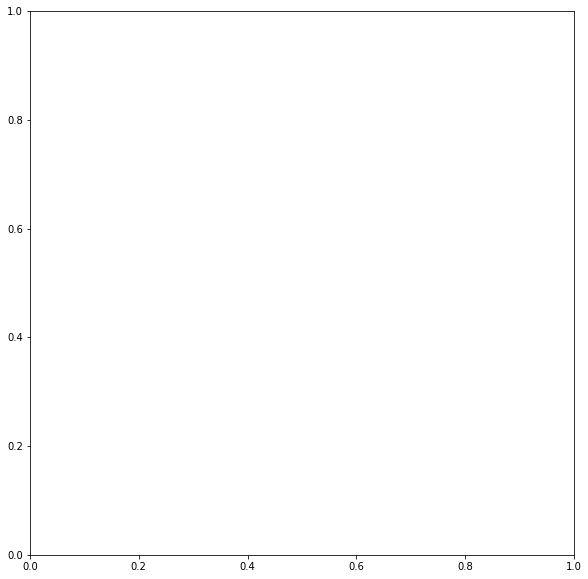

In [39]:
AllData4.plot(column='homevalues2015', figsize=(10,10), legend=True)

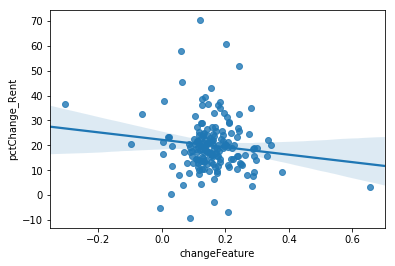

In [33]:
sns.regplot(x='changeFeature', y='pctChange_Rent', , data=AllData3)

In [35]:
AllData3.loc[:,['changeFeature', 'pctChange_Rent', 'pctChange_Home']].corr()

,changeFeature,pctChange_Rent,pctChange_Home
changeFeature,1.000000,-0.123822,-0.099418
pctChange_Rent,-0.123822,1.000000,0.250488
pctChange_Home,-0.099418,0.250488,1.000000


In [53]:
Jobs11101 = 25000
Jobs10001 = 95752
Jobs10017 = 11333

In [54]:
NewJobs = {11101:25000, 10001:95752, 10017:11333}

In [56]:
Change = {zips:[] for zips in data['ZIPCODE']}

for key, value in zipsUnderHour.iteritems():
    print value
    feature = 0.0
    for i, val in enumerate(value):
        #print val
        if int(val) in NewJobs.keys():
            change = NewJobs.get(int(val))
        else:
            change = 0
        #print change.values[0]
        time = zipsUnderHourTimes.get(key)[i]
        if time == 0:
            time = 1
        #print type(change)
        #if len(change) != 0 and ~np.isnan(change.values[0]):

        feature = feature + float(change)/float(time)
        
        #else:
        #    pass
        
    Change[key] = feature

['10474', '11101', '11102', '11103', '11104', '10047', '10048', '10055', '10065', '10069', '10075', '10080', '10081', '10096', '10097', '10103', '10104', '10105', '10106', '10107', '10110', '10111', '10112', '10115', '10302', '10304', '10305', '10306', '10310', '10451', '10452', '10453', '10454', '10455', '10456', '10457', '10458', '10459', '10460', '10461', '10462', '10463', '10465', '10467', '10468', '10470', '10472', '10118', '10119', '10120', '10121', '10122', '10123', '10128', '10151', '10152', '10153', '10154', '10155', '10158', '10162', '10165', '10166', '10167', '10168', '10169', '10170', '10171', '10172', '10174', '10178', '10196', '10203', '10259', '10260', '10265', '10270', '10271', '10275', '10278', '10279', '10280', '10281', '10285', '10286', '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10009', '10010', '10011', '10012', '10013', '10014', '10016', '10017', '10018', '10019', '10020', '10021', '10024', '10025', '10026', '10027', '10028', '10029', '10030', 

In [57]:
Change

{10001.0: 97378.6231884058,
 10002.0: 5828.836996336996,
 10003.0: 7125.046514161219,
 10004.0: 5311.254643206256,
 10005.0: 5673.951612903225,
 10006.0: 6719.538888888888,
 10007.0: 7729.5849462365595,
 10009.0: 5446.709277389276,
 10010.0: 8225.95652173913,
 10011.0: 12220.444444444443,
 10012.0: 6345.612145748989,
 10013.0: 7339.308095952024,
 10014.0: 8099.200184331798,
 10016.0: 7768.645029239767,
 10017.0: 18436.058823529413,
 10018.0: 10458.330853289932,
 10019.0: 7071.229644624382,
 10020.0: 8716.780392156863,
 10021.0: 6389.601871657753,
 10022.0: 7208.066942719117,
 10023.0: 7213.922077922079,
 10024.0: 5432.348383500557,
 10025.0: 5200.868279569892,
 10026.0: 4630.09216909217,
 10027.0: 6326.232280701754,
 10028.0: 5473.8761904761905,
 10029.0: 3311.552362707535,
 10030.0: 3809.5686972419962,
 10031.0: 3938.54975171525,
 10032.0: 3824.812599681021,
 10033.0: 3439.8151927437643,
 10034.0: 3355.094790442617,
 10035.0: 4404.163159065629,
 10036.0: 9098.375782112626,
 10037.0: 4

In [58]:
ChangePred = pd.DataFrame.from_dict(Change, orient='index', columns=['predFeature'])
ChangePred['ZIPCODE'] = ChangePred.index
ChangePred.reset_index(drop=True, inplace=True)
ChangePred.head()

,predFeature,ZIPCODE
0,6216.318966,10259.0
1,5651.554380,10260.0
2,5286.286838,10265.0
3,5602.678524,10270.0
4,6216.318966,10271.0


In [59]:
AllData5 = AllData4.merge(ChangePred, on='ZIPCODE')
AllData5.head()

,ZIPCODE,2014_main,2013_main,2013_aux,COUNTY,2015_main,2012_total,2010_main,2014_total,2010_total,...,households_y,pctChange_Rent,households,incomeChange,educationChange,homevalue2010,homevalue2015,rentvalue2010,rentvalue2015,predFeature
0,10001.0,158081.306253,147100.025839,29495.888233,New York,154839.319753,170271.223443,127396.025668,189201.340778,149992.497620,...,24168.0,34.826552,23360.0,0.305691,3.771518,457982.163708,5.791209e+05,1427.204856,2005.557866,97378.623188
1,10002.0,19097.528421,17311.940049,1721.605455,New York,21439.070402,20205.790472,17501.189156,21019.026500,18817.103810,...,63026.0,20.386593,43582.0,0.059098,5.507709,574335.103350,6.518112e+05,1014.040468,1241.488130,5828.836996
2,10003.0,64501.109568,62081.330388,10712.407074,New York,69158.840084,70059.871496,61530.840315,76009.878076,70894.659554,...,47486.0,23.782520,44141.0,0.186879,1.521574,712312.942888,7.192630e+05,1606.919874,1940.590789,7125.046514
3,10004.0,39238.790292,33490.618770,8178.384029,New York,41028.223248,43504.289005,30317.620752,48395.422181,37856.752472,...,NaN,NaN,20122.0,0.088852,5.446526,797216.459596,9.333029e+05,NaN,NaN,5311.254643
4,10005.0,42550.105749,43517.336279,13375.093312,New York,43330.350179,61201.345346,49133.608421,54751.143544,62925.121081,...,NaN,NaN,62471.0,0.020961,5.907278,874000.000000,1.035900e+06,NaN,NaN,5673.951613


In [60]:
AllData5.sort_values(by='predFeature').tail()

,ZIPCODE,2014_main,2013_main,2013_aux,COUNTY,2015_main,2012_total,2010_main,2014_total,2010_total,...,households_y,pctChange_Rent,households,incomeChange,educationChange,homevalue2010,homevalue2015,rentvalue2010,rentvalue2015,predFeature
15,10018.0,112233.623764,106314.657020,24949.140647,New York,123552.107149,119341.751937,90343.568371,138294.233478,108969.149723,...,8571.0,51.822234,6157.0,0.332198,14.831812,744742.212116,951929.478642,1587.373646,2345.324910,10458.330853
9,10011.0,55515.666029,52376.258343,10620.836319,New York,62592.587859,61136.018075,45433.256320,66858.000566,53743.976899,...,50246.0,22.561871,33119.0,0.257651,4.475879,806487.135062,910105.107723,1621.891301,1976.350916,12220.444444
14,10017.0,138206.178566,136896.634829,35013.080094,New York,147726.442681,168030.986800,134148.903935,173895.088778,164807.380426,...,11063.0,10.666091,44530.0,0.051958,4.774237,673615.851277,716656.579269,1903.208623,2034.711019,18436.058824
89,11101.0,65116.089191,65864.691868,8565.331742,Queens,70188.418418,72341.447174,51994.010282,73344.995987,57089.514468,...,20691.0,18.925163,15427.0,0.132454,6.526215,546482.381513,575678.834266,1174.854973,1448.085067,29349.416290
0,10001.0,158081.306253,147100.025839,29495.888233,New York,154839.319753,170271.223443,127396.025668,189201.340778,149992.497620,...,24168.0,34.826552,23360.0,0.305691,3.771518,457982.163708,579120.922197,1427.204856,2005.557866,97378.623188


In [62]:
olsFinal = smf.ols('homevalue2015 ~ Feature2015', data=AllData4).fit()
olsFinal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          homevalue2015   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     121.7
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           6.34e-22
Time:                        12:42:32   Log-Likelihood:                -2417.2
No. Observations:                 181   AIC:                             4838.
Df Residuals:                     179   BIC:                             4845.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.874e+05   1.81e+04     21.354      0.000    3.52e+05    4.23e+05
Feature2015     1.9846      0.180     11.033      0.000       1.630       2.340
==============================================================================
Omnibus:                       16.637   Durbin-Watson:                   1.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.330
Skew:                           0.561   Prob(JB):                     8.59e-06
Kurtosis:                       4.354   Cond. No.                     1.60e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
change = AllData5.predFeature*olsFinal.params[1]

In [65]:
AllData5['predictedChange'] = change
AllData5.head()

,ZIPCODE,2014_main,2013_main,2013_aux,COUNTY,2015_main,2012_total,2010_main,2014_total,2010_total,...,pctChange_Rent,households,incomeChange,educationChange,homevalue2010,homevalue2015,rentvalue2010,rentvalue2015,predFeature,predictedChange
0,10001.0,158081.306253,147100.025839,29495.888233,New York,154839.319753,170271.223443,127396.025668,189201.340778,149992.497620,...,34.826552,23360.0,0.305691,3.771518,457982.163708,5.791209e+05,1427.204856,2005.557866,97378.623188,193259.638017
1,10002.0,19097.528421,17311.940049,1721.605455,New York,21439.070402,20205.790472,17501.189156,21019.026500,18817.103810,...,20.386593,43582.0,0.059098,5.507709,574335.103350,6.518112e+05,1014.040468,1241.488130,5828.836996,11568.030961
2,10003.0,64501.109568,62081.330388,10712.407074,New York,69158.840084,70059.871496,61530.840315,76009.878076,70894.659554,...,23.782520,44141.0,0.186879,1.521574,712312.942888,7.192630e+05,1606.919874,1940.590789,7125.046514,14140.515291
3,10004.0,39238.790292,33490.618770,8178.384029,New York,41028.223248,43504.289005,30317.620752,48395.422181,37856.752472,...,NaN,20122.0,0.088852,5.446526,797216.459596,9.333029e+05,NaN,NaN,5311.254643,10540.826273
4,10005.0,42550.105749,43517.336279,13375.093312,New York,43330.350179,61201.345346,49133.608421,54751.143544,62925.121081,...,NaN,62471.0,0.020961,5.907278,874000.000000,1.035900e+06,NaN,NaN,5673.951613,11260.642212


In [66]:
AllData5['predicted_perc'] = AllData5['predictedChange']/AllData5['homevalue2015']
AllData5.head()

,ZIPCODE,2014_main,2013_main,2013_aux,COUNTY,2015_main,2012_total,2010_main,2014_total,2010_total,...,households,incomeChange,educationChange,homevalue2010,homevalue2015,rentvalue2010,rentvalue2015,predFeature,predictedChange,predicted_perc
0,10001.0,158081.306253,147100.025839,29495.888233,New York,154839.319753,170271.223443,127396.025668,189201.340778,149992.497620,...,23360.0,0.305691,3.771518,457982.163708,5.791209e+05,1427.204856,2005.557866,97378.623188,193259.638017,0.333712
1,10002.0,19097.528421,17311.940049,1721.605455,New York,21439.070402,20205.790472,17501.189156,21019.026500,18817.103810,...,43582.0,0.059098,5.507709,574335.103350,6.518112e+05,1014.040468,1241.488130,5828.836996,11568.030961,0.017748
2,10003.0,64501.109568,62081.330388,10712.407074,New York,69158.840084,70059.871496,61530.840315,76009.878076,70894.659554,...,44141.0,0.186879,1.521574,712312.942888,7.192630e+05,1606.919874,1940.590789,7125.046514,14140.515291,0.019660
3,10004.0,39238.790292,33490.618770,8178.384029,New York,41028.223248,43504.289005,30317.620752,48395.422181,37856.752472,...,20122.0,0.088852,5.446526,797216.459596,9.333029e+05,NaN,NaN,5311.254643,10540.826273,0.011294
4,10005.0,42550.105749,43517.336279,13375.093312,New York,43330.350179,61201.345346,49133.608421,54751.143544,62925.121081,...,62471.0,0.020961,5.907278,874000.000000,1.035900e+06,NaN,NaN,5673.951613,11260.642212,0.010870


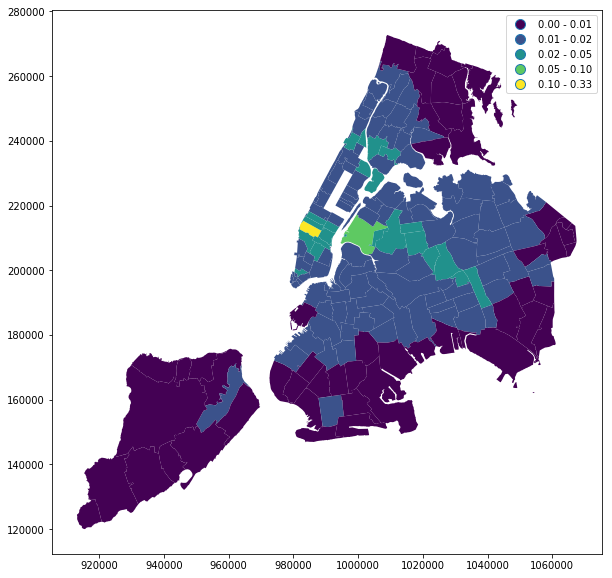

In [71]:
AllData5[~AllData5.predicted_perc.isna()].plot(column='predicted_perc', figsize=(10,10), legend=True, scheme='fisher_jenks', k=5)

In [72]:
olsFinal1 = smf.ols('homevalue2015 ~ Feature2015 + incomeChange + educationChange', data=AllData4).fit()
olsFinal1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          homevalue2015   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     42.70
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           1.28e-20
Time:                        12:56:24   Log-Likelihood:                -2321.8
No. Observations:                 174   AIC:                             4652.
Df Residuals:                     170   BIC:                             4664.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3.723e+05   1.94e+04     19.167      0.000    3.34e+05    4.11e+05
Feature2015         1.8144      0.192      9.443      0.000       1.435       2.194
incomeChange     1.246e+05   9.06e+04      1.375      0.171   -5.43e+04    3.03e+05
educationChange  6378.8759   3101.775      2.057      0.041     255.919    1.25e+04
==============================================================================
Omnibus:                       21.015   Durbin-Watson:                   1.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.150
Skew:                           0.682   Prob(JB):                     1.72e-07
Kurtosis:                       4.560   Cond. No.                     7.99e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
AllData5.to_file('AllData5/AllData5.shp')

In [165]:
zipsFeature2Data = pd.DataFrame.from_dict(zipsFeatures, orient='index', columns=['Feature2'])
zipsFeature2Data.head()

,Feature2
10259.0,159488.413033
10260.0,166000.273415
10265.0,182142.422779
10270.0,161272.645067
10271.0,167119.944427


In [166]:
zipsFeature2Data['ZIPCODE'] = zipsFeature2Data.index
zipsFeature2Data.reset_index(drop=True, inplace=True)
zipsFeature2Data.head()

,Feature2,ZIPCODE
0,159488.413033,10259.0
1,166000.273415,10260.0
2,182142.422779,10265.0
3,161272.645067,10270.0
4,167119.944427,10271.0


In [120]:
zipsFeatureData.to_csv('ZIPwithFeatureFinal.csv')

In [121]:
zipsFeatureData = dataJobs2.merge(zipsFeatureData, on='ZIPCODE')

In [122]:
zipsFeatureData.head()

,ZIPCODE,2014_main,2013_main,2013_aux,COUNTY,2015_main,2012_total,2010_main,2014_total,2010_total,...,top,rank_notMN,top_notMN,top_all,x,y,CBDs,geometry,change,Feature
0,10001.0,158081.306253,147100.025839,29495.888233,New York,154839.319753,170271.223443,127396.025668,189201.340778,149992.497620,...,1,166.0,0,1,985100.719055,212599.489066,1.0,"POLYGON ((981958.6472873986 213464.4530421346,...",33581.710574,55715.800546
1,10002.0,19097.528421,17311.940049,1721.605455,New York,21439.070402,20205.790472,17501.189156,21019.026500,18817.103810,...,0,166.0,0,0,988220.437683,200190.136386,-1.0,"POLYGON ((991339.8703228086 207576.7837151289,...",4485.946236,23065.189477
2,10003.0,64501.109568,62081.330388,10712.407074,New York,69158.840084,70059.871496,61530.840315,76009.878076,70894.659554,...,0,166.0,0,0,987340.306340,205944.672343,-1.0,"POLYGON ((989830.469142139 207048.1263078749, ...",9300.254130,32413.179554
3,10004.0,39238.790292,33490.618770,8178.384029,New York,41028.223248,43504.289005,30317.620752,48395.422181,37856.752472,...,1,166.0,0,1,980687.983241,195570.586613,0.0,"POLYGON ((981197.408652395 196571.0816452205, ...",11946.176866,28441.221900
4,10005.0,42550.105749,43517.336279,13375.093312,New York,43330.350179,61201.345346,49133.608421,54751.143544,62925.121081,...,1,166.0,0,1,981855.750490,196537.330032,0.0,"POLYGON ((982595.6794779003 195880.7536295503,...",-8975.783231,13329.977946


In [187]:
dataJobs2 = gpd.read_file('nyc_cbds_final/nyc_cbds_final.shp')

In [175]:
dataJobs2.head()

,ZIPCODE,2014_main,2013_main,2013_aux,COUNTY,2015_main,2012_total,2010_main,2014_total,2010_total,...,2015_per_m,rank,top,rank_notMN,top_notMN,top_all,x,y,CBDs,geometry
0,83.0,NaN,NaN,NaN,New York,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,0,0,993788.744524,224355.691895,-1.0,"POLYGON ((998309.7254775614 229616.6812362969,..."
1,10001.0,158081.306253,147100.025839,29495.888233,New York,154839.319753,170271.223443,127396.025668,189201.340778,149992.497620,...,287591.963163,9.0,1,166.0,0,1,985100.719055,212599.489066,1.0,"POLYGON ((981958.6472873986 213464.4530421346,..."
2,10002.0,19097.528421,17311.940049,1721.605455,New York,21439.070402,20205.790472,17501.189156,21019.026500,18817.103810,...,24719.910595,39.0,0,166.0,0,0,988220.437683,200190.136386,-1.0,"POLYGON ((991339.8703228086 207576.7837151289,..."
3,10003.0,64501.109568,62081.330388,10712.407074,New York,69158.840084,70059.871496,61530.840315,76009.878076,70894.659554,...,143880.788255,19.0,0,166.0,0,0,987340.306340,205944.672343,-1.0,"POLYGON ((989830.469142139 207048.1263078749, ..."
4,10004.0,39238.790292,33490.618770,8178.384029,New York,41028.223248,43504.289005,30317.620752,48395.422181,37856.752472,...,346882.881920,8.0,1,166.0,0,1,980687.983241,195570.586613,0.0,"POLYGON ((981197.408652395 196571.0816452205, ..."


In [176]:
dataJobs3 = dataJobs2.merge(zipsFeature2Data, on='ZIPCODE')


In [188]:
dataJobs4 = dataJobs3.merge(zipsFeature1Data, on='ZIPCODE')
dataJobs4.head()

,ZIPCODE,2014_main,2013_main,2013_aux,COUNTY,2015_main,2012_total,2010_main,2014_total,2010_total,...,top,rank_notMN,top_notMN,top_all,x,y,CBDs,geometry,Feature2,Feature1
0,10001.0,158081.306253,147100.025839,29495.888233,New York,154839.319753,170271.223443,127396.025668,189201.340778,149992.497620,...,1,166.0,0,1,985100.719055,212599.489066,1.0,"POLYGON ((981958.6472873986 213464.4530421346,...",316949.476640,55715.800546
1,10002.0,19097.528421,17311.940049,1721.605455,New York,21439.070402,20205.790472,17501.189156,21019.026500,18817.103810,...,0,166.0,0,0,988220.437683,200190.136386,-1.0,"POLYGON ((991339.8703228086 207576.7837151289,...",143324.512240,23065.189477
2,10003.0,64501.109568,62081.330388,10712.407074,New York,69158.840084,70059.871496,61530.840315,76009.878076,70894.659554,...,0,166.0,0,0,987340.306340,205944.672343,-1.0,"POLYGON ((989830.469142139 207048.1263078749, ...",219297.500231,32413.179554
3,10004.0,39238.790292,33490.618770,8178.384029,New York,41028.223248,43504.289005,30317.620752,48395.422181,37856.752472,...,1,166.0,0,1,980687.983241,195570.586613,0.0,"POLYGON ((981197.408652395 196571.0816452205, ...",190012.120906,28441.221900
4,10005.0,42550.105749,43517.336279,13375.093312,New York,43330.350179,61201.345346,49133.608421,54751.143544,62925.121081,...,1,166.0,0,1,981855.750490,196537.330032,0.0,"POLYGON ((982595.6794779003 195880.7536295503,...",201052.575636,13329.977946


In [189]:
dataJobs4.to_file('FinalData/FinalData.shp')

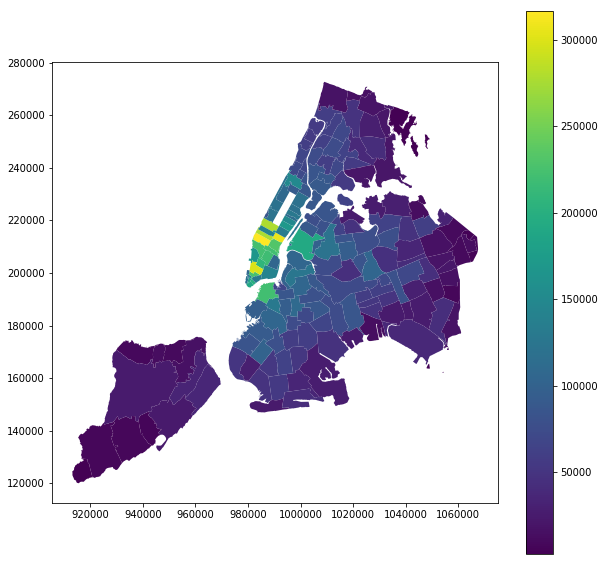

In [177]:
dataJobs3.plot(column='Feature2', figsize=(10,10), legend=True)

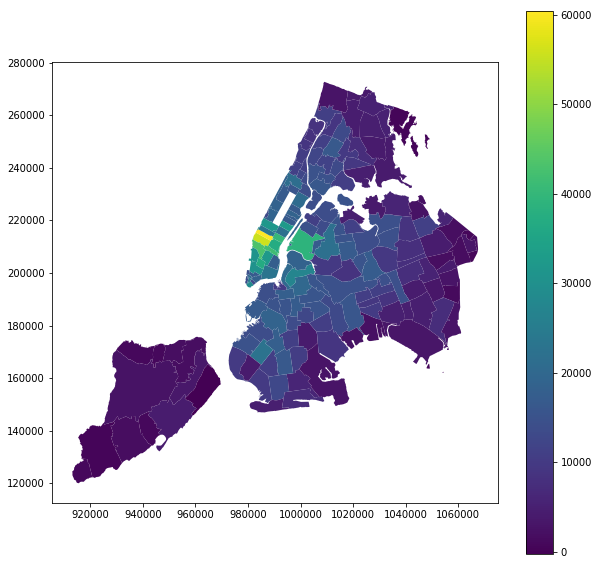

In [123]:
zipsFeatureData.plot(column='Feature', figsize=(10,10), legend=True)

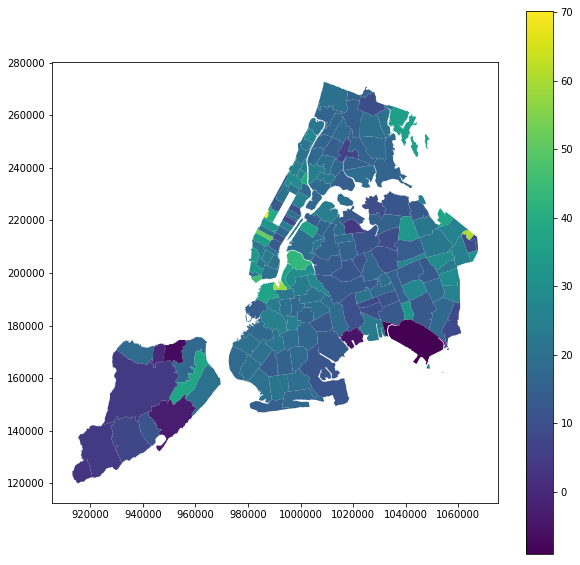

In [141]:
AllData.loc[~AllData.pctChange_Rent.isnull(),:].plot(column='pctChange_Rent', figsize=(10,10), legend=True)

In [124]:
zipsFeatureData.to_file('ZipsWithFeatures/ZipsWithFeatures.shp')

In [105]:
zipsFeatureData.sort_values(by='Feature', ascending=True).head()

,ZIPCODE,2014_main,2013_main,2013_aux,COUNTY,2015_main,2012_total,2010_main,2014_total,2010_total,...,top,rank_notMN,top_notMN,top_all,x,y,CBDs,geometry,change,Feature
11,10013.0,180913.830840,185392.757013,23175.009886,New York,141433.859878,205603.693476,176304.313616,204185.107776,195234.383915,...,1,166.0,0,1,9.828817e+05,201679.460586,0.0,"POLYGON ((983216.1014653891 203868.9381124675,...",-35423.442520,-14062.634039
51,10305.0,8598.329003,12234.439335,1580.901951,Richmond,9774.295901,13965.287395,12707.356230,9621.918372,14240.243815,...,0,106.0,0,0,9.632944e+05,156090.559866,-1.0,"POLYGON ((966589.4293382317 163908.5154087991,...",-3391.152020,-1522.623275
48,10302.0,2830.879285,3222.952140,955.128738,Richmond,3784.839543,3969.972281,2927.784498,3781.526050,3819.778934,...,0,85.0,0,0,9.459348e+05,169127.012306,-1.0,"POLYGON ((945602.2692129016 172744.2838264704,...",947.911115,355.973041
55,10309.0,6044.863590,6057.009108,1101.767107,Richmond,6383.260881,7322.727009,6135.263399,7175.373920,7116.092632,...,0,134.0,0,0,9.235822e+05,132956.186164,-1.0,"POLYGON ((925030.2516299784 142864.4400429726,...",392.783522,513.392988
72,10464.0,1355.000000,1194.000000,59.000000,Bronx,1513.000000,1253.000000,1207.000000,1443.000000,1264.000000,...,0,139.0,0,0,1.039419e+06,255665.377987,-1.0,(POLYGON ((1047319.759675145 251630.1185085475...,330.000000,523.663251


In [88]:
dataJobs2[(dataJobs2.change.isna())]

,ZIPCODE,2014_main,2013_main,2013_aux,COUNTY,2015_main,2012_total,2010_main,2014_total,2010_total,...,rank,top,rank_notMN,top_notMN,top_all,x,y,CBDs,geometry,change
0,83.0,NaN,NaN,NaN,New York,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,0,0,9.937887e+05,224355.691895,-1.0,"POLYGON ((998309.7254775614 229616.6812362969,...",NaN
89,11096.0,NaN,NaN,NaN,Queens,NaN,NaN,NaN,NaN,NaN,...,NaN,0,NaN,0,0,1.048990e+06,164186.598015,-1.0,(POLYGON ((1053924.112936229 162275.0921664685...,NaN


In [53]:
Jobs.sort_values(by='change').head()

,ZIPCODE,2014_main,2013_main,2013_aux,COUNTY,2015_main,2012_total,2010_main,2014_total,2010_total,...,rank,top,rank_notMN,top_notMN,top_all,x,y,CBDs,change,geometry
97,11201.0,201784.405152,203202.893439,15596.958424,Kings,98413.647980,215315.284097,206800.284905,217744.205031,220815.929240,...,25.0,0,1.0,2,2,987194.513467,192431.928028,2.0,-111745.477205,"POLYGON ((990158.9799680561 196291.4030707181,..."
12,10013.0,180913.830840,185392.757013,23175.009886,New York,141433.859878,205603.693476,176304.313616,204185.107776,195234.383915,...,10.0,1,166.0,0,1,982881.748930,201679.460586,0.0,-35423.442520,"POLYGON ((983216.1014653891 203868.9381124675,..."
5,10005.0,42550.105749,43517.336279,13375.093312,New York,43330.350179,61201.345346,49133.608421,54751.143544,62925.121081,...,2.0,1,166.0,0,1,981855.750490,196537.330032,0.0,-8975.783231,"POLYGON ((982595.6794779003 195880.7536295503,..."
7,10007.0,52480.335645,51647.337340,6896.658927,New York,47733.664321,58101.057340,56677.860098,59745.840353,62990.126881,...,11.0,1,166.0,0,1,982160.651275,199404.802224,0.0,-8497.930887,"POLYGON ((980538.9073447287 200658.5114624649,..."
52,10305.0,8598.329003,12234.439335,1580.901951,Richmond,9774.295901,13965.287395,12707.356230,9621.918372,14240.243815,...,153.0,0,106.0,0,0,963294.354582,156090.559866,-1.0,-3391.152020,"POLYGON ((966589.4293382317 163908.5154087991,..."


In [355]:
rent = pd.read_csv('HomeAndRentValues.csv')
rent.head()

,Unnamed: 0,ZIPCODE,pctChange_Home,households_x,pctChange_Rent,households_y
0,0,83,3.135728,10551.0,18.173679,14381.0


In [356]:
dataJobs = dataJobs.merge(rent, on='ZIPCODE')

In [357]:
dataJobs.head(2)

,Unnamed: 0_x,ZIPCODE,2015_total,geometry,perc_change,0,Unnamed: 0_y,pctChange_Home,households_x,pctChange_Rent,households_y
0,1,10001.0,183574.208194,"POLYGON ((981958.6472873986 213464.4530421346,...",0.223889,183,1,54.210963,17566.0,34.826552,24168.0
1,2,10002.0,23303.050046,"POLYGON ((991339.8703228086 207576.7837151289,...",0.238397,168,2,11.850706,28097.0,20.386593,63026.0


Text(0,0.5,'Number of zips connected to a zip')

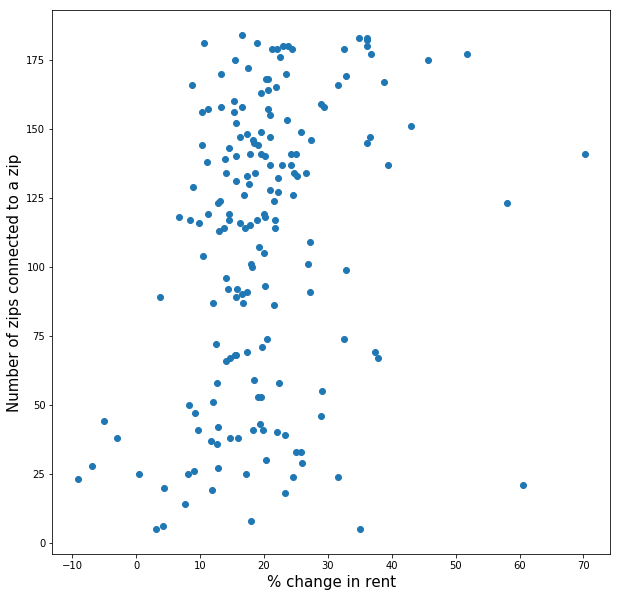

In [358]:
plt.figure(figsize=(10,10))
plt.plot(dataJobs['pctChange_Rent'], dataJobs[0], 'o')
plt.xlabel('% change in rent', fontsize=15)
plt.ylabel('Number of zips connected to a zip', fontsize=15)

In [359]:
dataJobs.corr()

,Unnamed: 0_x,ZIPCODE,2015_total,perc_change,0,Unnamed: 0_y,pctChange_Home,households_x,pctChange_Rent,households_y
Unnamed: 0_x,1.000000,0.954542,-0.422011,0.195778,-0.340684,0.999901,-0.206971,0.002255,-0.190302,-0.133618
ZIPCODE,0.954542,1.000000,-0.364928,0.195648,-0.278223,0.954897,-0.190436,0.062420,-0.154245,-0.068358
2015_total,-0.422011,-0.364928,1.000000,-0.243847,0.448160,-0.424442,0.072914,0.190339,0.149691,0.079329
perc_change,0.195778,0.195648,-0.243847,1.000000,-0.046241,0.195835,-0.042816,-0.032125,-0.078453,-0.008797
0,-0.340684,-0.278223,0.448160,-0.046241,1.000000,-0.346209,0.299568,0.177843,0.296990,0.280447
Unnamed: 0_y,0.999901,0.954897,-0.424442,0.195835,-0.346209,1.000000,-0.208603,0.002343,-0.193379,-0.132939
pctChange_Home,-0.206971,-0.190436,0.072914,-0.042816,0.299568,-0.208603,1.000000,0.012630,0.270430,0.041377
households_x,0.002255,0.062420,0.190339,-0.032125,0.177843,0.002343,0.012630,1.000000,-0.218975,0.842605
pctChange_Rent,-0.190302,-0.154245,0.149691,-0.078453,0.296990,-0.193379,0.270430,-0.218975,1.000000,-0.187585
households_y,-0.133618,-0.068358,0.079329,-0.008797,0.280447,-0.132939,0.041377,0.842605,-0.187585,1.000000


In [36]:
RentAndHouse = pd.read_csv('AllVariables.csv')
RentAndHouse.head()

,Unnamed: 0,ZIPCODE,homevalue2010,pctChange_Home,households_x,homevalue2015,pctChange_Rent,households_y,rentvalue2015,rentvalue2010,households,incomeChange,educationChange
0,0,83,907300.000000,-6.635071,5078.0,847100.000000,27.950924,9358.0,1569.035798,1179.090831,9358.0,0.318170,4.534142
1,1,10001,457982.163708,67.244957,8393.0,579120.922197,39.558873,14620.0,2005.557866,1427.204856,23360.0,0.418086,3.908656
2,2,10002,574335.103350,12.320717,19642.0,651811.210671,23.449845,42503.0,1241.488130,1014.040468,43582.0,0.067918,4.799977
3,3,10003,712312.942888,0.711683,21309.0,719262.982777,20.683363,36480.0,1940.590789,1606.919874,44141.0,0.153256,3.072823
4,4,10004,797216.459596,16.892533,20122.0,933302.922175,NaN,NaN,NaN,NaN,20122.0,0.062952,5.618398


In [37]:
RentAndHouse = RentAndHouse[['ZIPCODE', 'homevalue2010', 'homevalue2015', 'rentvalue2010', 'rentvalue2015']]

In [38]:
AllData4 = AllData3.merge(RentAndHouse, on='ZIPCODE')
AllData4.head()

,ZIPCODE,2014_main,2013_main,2013_aux,COUNTY,2015_main,2012_total,2010_main,2014_total,2010_total,...,pctChange_Home,households_y,pctChange_Rent,households,incomeChange,educationChange,homevalue2010,homevalue2015,rentvalue2010,rentvalue2015
0,10001.0,158081.306253,147100.025839,29495.888233,New York,154839.319753,170271.223443,127396.025668,189201.340778,149992.497620,...,54.210963,24168.0,34.826552,23360.0,0.305691,3.771518,457982.163708,5.791209e+05,1427.204856,2005.557866
1,10002.0,19097.528421,17311.940049,1721.605455,New York,21439.070402,20205.790472,17501.189156,21019.026500,18817.103810,...,11.850706,63026.0,20.386593,43582.0,0.059098,5.507709,574335.103350,6.518112e+05,1014.040468,1241.488130
2,10003.0,64501.109568,62081.330388,10712.407074,New York,69158.840084,70059.871496,61530.840315,76009.878076,70894.659554,...,14.800921,47486.0,23.782520,44141.0,0.186879,1.521574,712312.942888,7.192630e+05,1606.919874,1940.590789
3,10004.0,39238.790292,33490.618770,8178.384029,New York,41028.223248,43504.289005,30317.620752,48395.422181,37856.752472,...,10.282341,NaN,NaN,20122.0,0.088852,5.446526,797216.459596,9.333029e+05,NaN,NaN
4,10005.0,42550.105749,43517.336279,13375.093312,New York,43330.350179,61201.345346,49133.608421,54751.143544,62925.121081,...,18.524027,NaN,NaN,62471.0,0.020961,5.907278,874000.000000,1.035900e+06,NaN,NaN


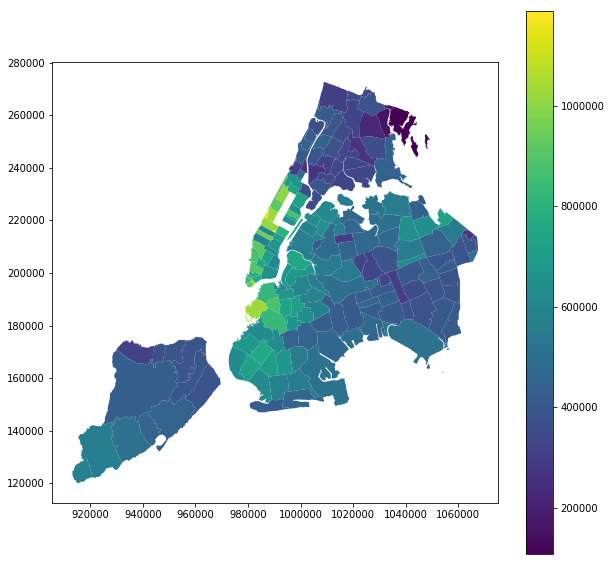

In [41]:
AllData4[~AllData4.homevalue2015.isna()].plot(column='homevalue2015', figsize=(10,10), legend=True)

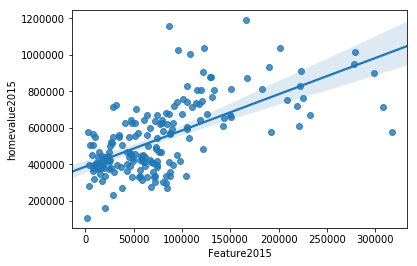

In [42]:
sns.regplot('Feature2015', 'homevalue2015', data=AllData4)

In [48]:
ols1 = smf.ols('homevalue2015 ~ Feature2015', data=AllData4).fit()
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          homevalue2015   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     121.7
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           6.34e-22
Time:                        12:10:30   Log-Likelihood:                -2417.2
No. Observations:                 181   AIC:                             4838.
Df Residuals:                     179   BIC:                             4845.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.874e+05   1.81e+04     21.354      0.000    3.52e+05    4.23e+05
Feature2015     1.9846      0.180     11.033      0.000       1.630       2.340
==============================================================================
Omnibus:                       16.637   Durbin-Watson:                   1.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.330
Skew:                           0.561   Prob(JB):                     8.59e-06
Kurtosis:                       4.354   Cond. No.                     1.60e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

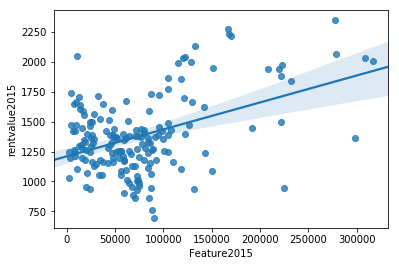

In [44]:
sns.regplot('Feature2015', 'rentvalue2015', data=AllData4)

In [45]:
ols1 = smf.ols('rentvalue2015 ~ Feature2015', data=AllData4).fit()
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          rentvalue2015   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     42.49
Date:                Thu, 13 Dec 2018   Prob (F-statistic):           7.40e-10
Time:                        12:04:57   Log-Likelihood:                -1244.6
No. Observations:                 176   AIC:                             2493.
Df Residuals:                     174   BIC:                             2500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1209.1143     34.045     35.516      0.000    1141.921    1276.308
Feature2015     0.0023      0.000      6.519      0.000       0.002       0.003
==============================================================================
Omnibus:                        0.926   Durbin-Watson:                   1.083
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.646
Skew:                           0.133   Prob(JB):                        0.724
Kurtosis:                       3.133   Cond. No.                     1.55e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
AllData3 = AllData2.merge(RentAndHouse, on='ZIPCODE')
AllData3.head()

,ZIPCODE,2014_main,2013_main,2013_aux,COUNTY,2015_main,2012_total,2010_main,2014_total,2010_total,...,Feature2010,changeFeature,Unnamed: 0,households_x,pctChange_Home,households_y,pctChange_Rent,households,incomeChange,educationChange
0,10001.0,158081.306253,147100.025839,29495.888233,New York,154839.319753,170271.223443,127396.025668,189201.340778,149992.497620,...,267939.324645,0.182915,1,17566.0,54.210963,24168.0,34.826552,23360.0,0.305691,3.771518
1,10002.0,19097.528421,17311.940049,1721.605455,New York,21439.070402,20205.790472,17501.189156,21019.026500,18817.103810,...,129710.150898,0.104960,2,28097.0,11.850706,63026.0,20.386593,43582.0,0.059098,5.507709
2,10003.0,64501.109568,62081.330388,10712.407074,New York,69158.840084,70059.871496,61530.840315,76009.878076,70894.659554,...,194400.854110,0.128069,3,30516.0,14.800921,47486.0,23.782520,44141.0,0.186879,1.521574
3,10004.0,39238.790292,33490.618770,8178.384029,New York,41028.223248,43504.289005,30317.620752,48395.422181,37856.752472,...,174863.728510,0.086630,4,22326.0,10.282341,NaN,NaN,20122.0,0.088852,5.446526
4,10005.0,42550.105749,43517.336279,13375.093312,New York,43330.350179,61201.345346,49133.608421,54751.143544,62925.121081,...,202755.736893,-0.008400,5,58729.0,18.524027,NaN,NaN,62471.0,0.020961,5.907278


In [158]:
AllData.head()

,ZIPCODE,2014_main,2013_main,2013_aux,COUNTY,2015_main,2012_total,2010_main,2014_total,2010_total,...,Feature,Unnamed: 0,households_x,pctChange_Home,households_y,pctChange_Rent,households,incomeChange,educationChange,Feature2


In [139]:
AllData.describe()

,ZIPCODE,2014_main,2013_main,2013_aux,2015_main,2012_total,2010_main,2014_total,2010_total,2010_aux,...,change,Feature,Unnamed: 0,households_x,pctChange_Home,households_y,pctChange_Rent,households,incomeChange,educationChange
count,184.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,183.000000,184.000000,184.000000,183.000000,183.000000,176.000000,176.000000,184.000000,177.000000,184.000000
mean,10794.135870,18421.900266,17795.135383,2686.133563,19429.824198,20017.534242,16977.314910,21212.349767,19256.589413,2279.274503,...,3729.681808,12875.295026,123.141304,24314.688525,6.273939,27309.494318,19.875712,21931.130435,0.100035,2.765594
std,562.815335,31179.942664,30763.087701,6272.326930,28292.745833,35647.397668,29274.590938,37163.881349,34038.067348,5241.696945,...,5840.147689,9955.059013,66.838208,12420.937969,27.013529,13625.792883,10.768569,11716.523087,0.133541,3.929105
min,10001.000000,5.811741,6.500000,0.655870,6.481781,6.987854,5.072874,6.315789,5.477733,0.404858,...,-8975.783231,-290.007542,1.000000,2031.000000,-50.507264,899.000000,-9.130915,708.000000,-0.517499,-9.400000
25%,10281.750000,4525.929587,4121.914236,256.532881,5757.610238,4515.220219,4004.810387,4806.807887,4431.149032,220.116210,...,946.778258,4870.338522,86.500000,15523.000000,-5.881532,17168.750000,14.062272,14166.250000,0.023817,0.311420
50%,11103.500000,8425.329673,7816.647925,619.248202,9804.120283,8423.857015,7576.749867,9100.715191,7960.547327,538.039642,...,2298.026944,11278.158146,132.500000,22839.000000,0.520075,25527.000000,18.938204,19359.000000,0.087948,1.994723
75%,11356.250000,16486.937950,16467.897832,1424.436315,19554.508650,17469.217955,15613.390268,18608.443238,17062.010824,1349.233936,...,4183.878514,16845.295921,178.250000,33340.000000,10.967952,37852.750000,23.654978,30460.250000,0.171954,5.116968
max,11436.000000,201784.405152,203202.893439,35869.200082,154839.319753,215315.284097,206800.284905,217744.205031,220815.929240,30658.476491,...,40848.427189,60426.517223,236.000000,58729.000000,249.072686,77919.000000,70.241864,66663.000000,0.719734,14.831812


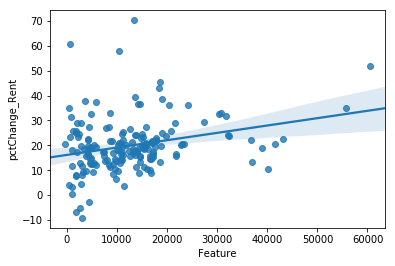

In [129]:
sns.regplot(x='Feature', y='pctChange_Rent', data=AllData)

In [130]:
ols1 = smf.ols('pctChange_Rent ~ Feature', data=AllData).fit()
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         pctChange_Rent   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     14.25
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           0.000219
Time:                        15:32:37   Log-Likelihood:                -660.59
No. Observations:                 176   AIC:                             1325.
Df Residuals:                     174   BIC:                             1332.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.1564      1.258     12.841      0.000      13.673      18.640
Feature        0.0003   7.82e-05      3.775      0.000       0.000       0.000
==============================================================================
Omnibus:                       65.228   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.181
Skew:                           1.417   Prob(JB):                     1.15e-52
Kurtosis:                       7.958   Cond. No.                     2.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

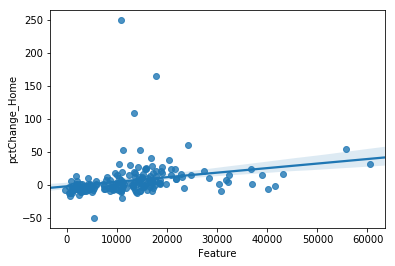

In [132]:
sns.regplot(x='Feature', y='pctChange_Home', data=AllData)

In [133]:
ols1 = smf.ols('pctChange_Home ~ Feature', data=AllData).fit()
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         pctChange_Home   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     12.55
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           0.000504
Time:                        15:35:45   Log-Likelihood:                -856.26
No. Observations:                 183   AIC:                             1717.
Df Residuals:                     181   BIC:                             1723.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5921      3.164     -0.819      0.414      -8.836       3.652
Feature        0.0007      0.000      3.543      0.001       0.000       0.001
==============================================================================
Omnibus:                      255.758   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18469.332
Skew:                           6.010   Prob(JB):                         0.00
Kurtosis:                      50.725   Cond. No.                     2.66e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
ols1 = smf.ols('pctChange_Rent ~ Feature + incomeChange + educationChange', data=AllData).fit()
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         pctChange_Rent   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     7.533
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           9.38e-05
Time:                        15:36:42   Log-Likelihood:                -631.00
No. Observations:                 169   AIC:                             1270.
Df Residuals:                     165   BIC:                             1283.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          15.3985      1.318     11.681      0.000      12.796      18.001
Feature             0.0002   8.41e-05      2.130      0.035    1.31e-05       0.000
incomeChange       12.2550      6.179      1.983      0.049       0.054      24.455
educationChange     0.4241      0.208      2.040      0.043       0.014       0.835
==============================================================================
Omnibus:                       67.353   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.859
Skew:                           1.475   Prob(JB):                     1.25e-60
Kurtosis:                       8.520   Cond. No.                     1.28e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
ols1 = smf.ols('pctChange_Home ~ Feature + incomeChange + educationChange', data=AllData).fit()
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         pctChange_Home   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     4.047
Date:                Wed, 12 Dec 2018   Prob (F-statistic):            0.00823
Time:                        15:37:03   Log-Likelihood:                -824.85
No. Observations:                 176   AIC:                             1658.
Df Residuals:                     172   BIC:                             1670.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -3.1899      3.406     -0.937      0.350      -9.913       3.533
Feature             0.0006      0.000      2.942      0.004       0.000       0.001
incomeChange        1.0122     15.926      0.064      0.949     -30.423      32.447
educationChange     0.3643      0.536      0.679      0.498      -0.694       1.423
==============================================================================
Omnibus:                      250.894   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18690.358
Skew:                           6.130   Prob(JB):                         0.00
Kurtosis:                      51.973   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [157]:
AllData = AllData.merge(zipsFeature2Data, on='ZIPCODE')
AllData.head()

,ZIPCODE,2014_main,2013_main,2013_aux,COUNTY,2015_main,2012_total,2010_main,2014_total,2010_total,...,Feature,Unnamed: 0,households_x,pctChange_Home,households_y,pctChange_Rent,households,incomeChange,educationChange,Feature2
